In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import sqlite3
import pandas as pd

# Chemin vers votre fichier de base de données SQLite
db_path = '../photofeeler_data/dynamic_photofeeler.db'

try:
    # Connexion à la base de données SQLite
    conn = sqlite3.connect(db_path)

    # Exécution de la requête SQL pour la table 'Photos'
    query_photos = "SELECT * FROM Photos"
    df_photos = pd.read_sql_query(query_photos, conn)

    # Exécution de la requête SQL pour la table 'Scores'
    query_scores = "SELECT * FROM Scores"
    df_scores = pd.read_sql_query(query_scores, conn)

    # Exécution de la requête SQL pour la table 'Votes'
    query_votes = "SELECT * FROM Votes"
    df_votes = pd.read_sql_query(query_votes, conn)

except sqlite3.Error as e:
    print("An error occurred:", e)

finally:
    # Fermer la connexion à la base de données
    if conn:
        conn.close()

def convert_columns_to_float(df):
    for col in df.columns:
        try:
            df[col] = df[col].astype(float)
        except :
            pass
    return df


df_merged = pd.merge(df_scores, df_photos[['photo_id',
                                           'categorie', 
                                           'votes', 
                                           'photo_url']], on="photo_id")

df = pd.merge(df_votes, df_merged[['score_id', 
                                   'critere', 
                                   'score_value', 
                                   'categorie', 
                                   'photo_url', 
                                   'votes']], on='score_id', how='left')

df_main = convert_columns_to_float(df)
for v in ["no", "somewhat", "yes", "very"]:
    df_main[v] = round(df_main[v]/df_main["votes"], 3)

In [19]:
df_main[df_main.critere == "Attractive"].sort_values("very", ascending=False).head(10)

,vote_id,score_id,no,somewhat,yes,very,critere,score_value,categorie,photo_url,votes
71,72.0,72.0,0.200,0.500,0.000,0.300,Attractive,4.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/ptsdbm...,10.0
29,30.0,30.0,0.095,0.429,0.333,0.143,Attractive,8.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pdhy53...,21.0
107,108.0,108.0,0.111,0.556,0.222,0.111,Attractive,6.4,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/ph4uqm...,9.0
59,60.0,60.0,0.222,0.444,0.222,0.111,Attractive,6.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pg60tv...,9.0
53,54.0,54.0,0.100,0.400,0.400,0.100,Attractive,6.2,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pnsh3c...,10.0
83,84.0,84.0,0.182,0.636,0.091,0.091,Attractive,5.4,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/p95ozz...,11.0
38,39.0,39.0,0.143,0.429,0.357,0.071,Attractive,7.8,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pelg6m...,14.0
56,57.0,57.0,0.133,0.267,0.533,0.067,Attractive,7.6,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pq9ywf...,15.0
23,24.0,24.0,0.000,0.263,0.684,0.053,Attractive,8.7,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pdhy53...,19.0
35,36.0,36.0,0.103,0.487,0.359,0.051,Attractive,8.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pn2ldv...,39.0


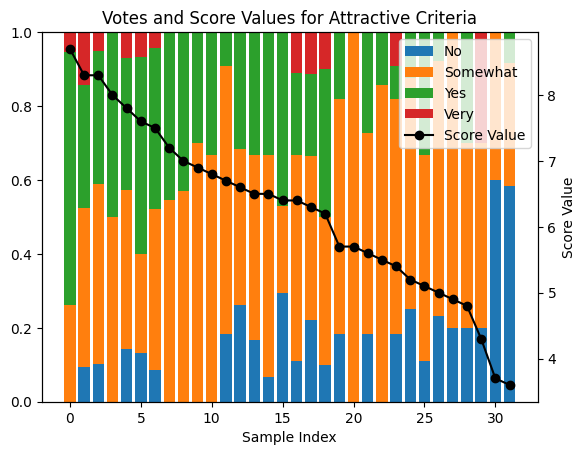

In [43]:
df = df_main[df_main.critere == "Attractive"]
#df = df_main[df_main.categorie == "DATING"]
df = df.sort_values("score_value", ascending=False)

# Définir les indices pour l'axe X
#ind = df.sort_values("very", ascending=False).index
ind = range(0,len(df))

fig, ax1 = plt.subplots()

# Créer les barres empilées pour les votes
ax1.bar(ind, df['no'], label='No')
ax1.bar(ind, df['somewhat'], bottom=df['no'], label='Somewhat')
ax1.bar(ind, df['yes'], bottom=df['no'] + df['somewhat'], label='Yes')
ax1.bar(ind, df['very'], bottom=df['no'] + df['somewhat'] + df['yes'], label='Very')

# Ajouter des titres et des labels
ax1.set_xlabel('Sample Index')
#ax1.set_ylabel('Votes')
ax1.set_title('Votes and Score Values for Attractive Criteria')

# Créer un axe secondaire
ax2 = ax1.twinx()
ax2.plot(ind, df['score_value'], label='Score Value', color='k', marker='o', linestyle='-')
ax2.set_ylabel('Score Value')

"""# Créer un axe tertiaire
ax3 = ax1.twinx()
ax3.plot(ind, df['votes'], label='votes', color='k', marker='.', linestyle='--')
ax3.set_ylabel('nb votes')"""

# Ajouter les légendes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Afficher le graphe
plt.show()

In [54]:
df_main[(df_main.critere == "Attractive") & (df_main.score_value > 5)].sort_values("score_value", ascending=False).head(15)

,vote_id,score_id,no,somewhat,yes,very,critere,score_value,categorie,photo_url,votes
23,24.0,24.0,0.000,0.263,0.684,0.053,Attractive,8.7,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pdhy53...,19.0
29,30.0,30.0,0.095,0.429,0.333,0.143,Attractive,8.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pdhy53...,21.0
35,36.0,36.0,0.103,0.487,0.359,0.051,Attractive,8.3,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pn2ldv...,39.0
89,90.0,90.0,0.000,0.500,0.500,0.000,Attractive,8.0,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pj20kp...,12.0
38,39.0,39.0,0.143,0.429,0.357,0.071,Attractive,7.8,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pelg6m...,14.0
56,57.0,57.0,0.133,0.267,0.533,0.067,Attractive,7.6,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pq9ywf...,15.0
11,12.0,12.0,0.087,0.435,0.435,0.043,Attractive,7.5,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/p602cz...,23.0
92,93.0,93.0,0.000,0.545,0.455,0.000,Attractive,7.2,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pwl1y8...,11.0
14,15.0,15.0,0.000,0.571,0.429,0.000,Attractive,7.0,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/pgthuh...,7.0
20,21.0,21.0,0.000,0.700,0.300,0.000,Attractive,6.9,DATING,https://d2oezb05uoa2c1.cloudfront.net/p/p4ald2...,10.0


In [49]:
for v in ["no", "somewhat", "yes", "very"]:
    m = df_main[(df_main.critere == "Attractive") & (df_main.score_value > 7)][v].mean()
    m = round(m*10, 1)
    print(f"moyenne {v} : {m}")

moyenne no : 0.7
moyenne somewhat : 4.2
moyenne yes : 4.6
moyenne very : 0.5


In [51]:
for v in ["no", "somewhat", "yes", "very"]:
    m = df_main[(df_main.critere == "Attractive") & 
                (df_main.score_value < 7) & 
                (df_main.score_value > 5)][v].mean()
    m = round(m*10, 1)
    print(f"moyenne {v} : {m}")

moyenne no : 1.4
moyenne somewhat : 5.9
moyenne yes : 2.5
moyenne very : 0.2
